In [2]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

In [3]:
df =pd.read_excel('data\TRUCKING.xlsx')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\DELL\AppData\Local\Temp\ipykernel_8360\1030833520.py:1: SyntaxWarning: invalid escape sequence '\T'
  df =pd.read_excel('data\TRUCKING.xlsx')


,Driving Assignmnet,x1,n_of_deliveries,travel_time
0,1,100,4,9.3
1,2,50,3,4.8
2,3,100,4,8.9
3,4,100,2,6.5
4,5,50,2,4.2


Text(0.5, 1.0, 'Linear regression with Miles traveles')

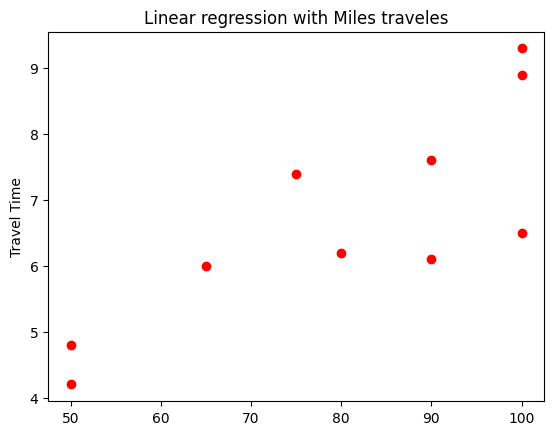

In [ ]:
plt.scatter(df.x1, df.travel_time, color = "red")
plt.ylabel('Travel Time')
plt.title('Linear regression with Miles traveles')
#there is a relation bw miles traveled and travel time
#one independent and one independent variable

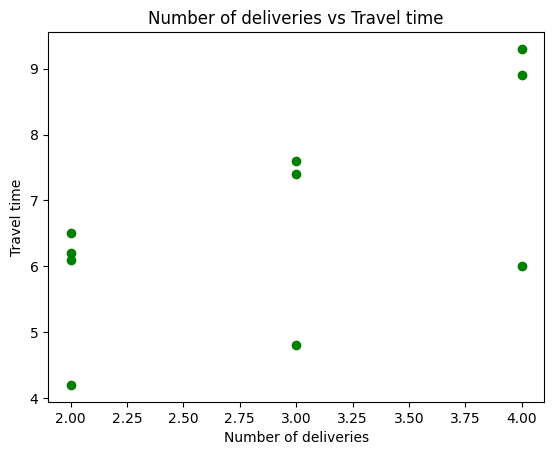

In [10]:
plt.scatter(df.n_of_deliveries, df.travel_time, color="green")
plt.ylabel('Travel time')
plt.xlabel('Number of deliveries')
plt.title('Number of deliveries vs Travel time')
plt.show()
#the figure shows positive relation

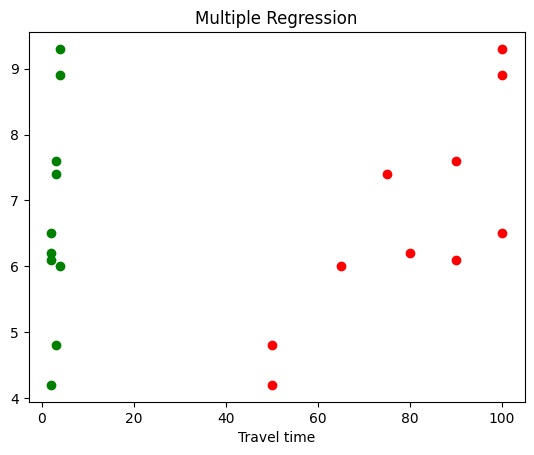

In [11]:
#joint graph
plt.scatter(df.n_of_deliveries, df.travel_time, color="green")
plt.scatter(df.x1, df.travel_time, color = "red")
plt.xlabel('Travel time')
plt.title('Multiple Regression')
plt.show()

In [14]:
#regression analysis
reg1 = ols("travel_time ~ x1", data = df).fit()
print(reg1.summary())
#travel time is the dependent variables
#x1 = distance traveled is independent

                            OLS Regression Results                            
Dep. Variable:            travel_time   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     15.81
Date:                Mon, 24 Mar 2025   Prob (F-statistic):            0.00408
Time:                        21:35:18   Log-Likelihood:                -13.092
No. Observations:                  10   AIC:                             30.18
Df Residuals:                       8   BIC:                             30.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2739      1.401      0.909      0.3

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
# Intercept = 1.2739         
# x1 = 0.0678 
#r squared = 0.664  
#this means 66.4% of the variation in the time can be explained by the x1 variabel

In [16]:
reg2 = ols('travel_time ~ x1 + n_of_deliveries', df).fit()
# model for multiple regression. more variables can be added to the model by adding + sign
print(reg2.summary())


                            OLS Regression Results                            
Dep. Variable:            travel_time   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.88
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           0.000276
Time:                        21:38:00   Log-Likelihood:                -6.8398
No. Observations:                  10   AIC:                             19.68
Df Residuals:                       7   BIC:                             20.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8687      0.952     

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
# Intercept = -0.8687
# x1 = 0.0611
# n_of_deliveries(x2) = 0.9234
#R-squared: 0.904 
#adding the new variable increases the explanability of the model
#SST =  sum_sq(x1) + sum_sq(x2)


Model
y = -0.869 + 0.0611x1 + 0.9234

In [ ]:
#anova table for time against distance
print(anova_lm(reg1))

           df     sum_sq    mean_sq          F   PR(>F)
x1        1.0  15.871304  15.871304  15.814578  0.00408
Residual  8.0   8.028696   1.003587        NaN      NaN


In [ ]:
#anova table for 2 independent variables
anova_table = anova_lm(reg2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,15.871304,15.871304,48.315660,0.000221
n_of_deliveries,1.0,5.729252,5.729252,17.441075,0.004157
Residual,7.0,2.299443,0.328492,NaN,NaN


In [ ]:
#after new variable introduced, error increased by 5 points, but total error reduced from 8 to 2
#R_squared = SST/SSR